In [3]:
import numpy as np
from numpy import mean
import numpy as np
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import pickle
import operator
import math

import json
from pandas.io.json import json_normalize
import nltk
import os
import regex as re
import string
import itertools
from math import *
import jiwer
from jiwer import wer

In [4]:
df = pd.read_pickle("df_clean_newwer_new_last.pkl")
df.shape 
df_original = df.copy()

In [5]:
al_test_df = df[df['reference.text'] == df['reference.text'].iloc[2]]

In [6]:
reference = al_test_df['reference.text'].iloc[0]
reference

"good don't ever drink scotch it's terrible"

In [7]:
ref = nltk.word_tokenize(reference)


In [8]:
ref

['good', 'do', "n't", 'ever', 'drink', 'scotch', 'it', "'s", 'terrible']

In [9]:
hypothesis = al_test_df['hypothesis.text'].values.tolist()
words=[word for sentence in hypothesis for word in sentence.split()]

In [10]:
print(words)

['good', "don't", 'ever', 'drink', 'scott', "it's", 'terrible', 'good', "don't", 'ever', 'drink', 'scott', "it's", 'terrible', 'good', "don't", 'ever', 'drink', 'sky', 'is', 'terrible', 'good', "don't", 'ever', 'drink', 'sky', 'is', 'terrible', 'good', "don't", 'ever', 'drink', 'scott', 'is', 'terrible', 'yeah', "don't", "everything's", 'got', "it's", 'terrible', 'good', "don't", 'even', 'think', 'scott', 'is', 'terrible', 'good', "don't", 'even', 'think', 'scott', 'is', 'terrible', "don't", 'ever', 'done', 'guy', 'is', 'terrible', "don't", 'ever', 'think', 'guy', 'is', 'terrible', 'good', "don't", 'ever', 'got', 'good', "don't", 'ever', 'got']


In [11]:
print(ref)

['good', 'do', "n't", 'ever', 'drink', 'scotch', 'it', "'s", 'terrible']


In [12]:
def to_words(sentence):
    rows = [] # list of list splitted sentences (rows)
    for s in sentences:
        rows.append(s.lower().split(' '))
    wordset = set()
    for row in rows:
        wordset.update(row)
    return list(wordset)

In [13]:
word_embeddings = c2v_model.vectorize_words(words)

In [14]:
word_embeddings

array([[-0.27624848, -0.23476927, -0.567259  , ...,  0.5906854 ,
         0.72185975,  0.2418187 ],
       [-0.23120669, -0.10756835, -0.6104041 , ...,  0.3465675 ,
         0.72270125,  0.85400987],
       [-0.6784863 , -0.5252243 , -0.52751976, ..., -0.26532617,
        -0.1031457 ,  0.18814206],
       ...,
       [-0.23120669, -0.10756835, -0.6104041 , ...,  0.3465675 ,
         0.72270125,  0.85400987],
       [-0.6784863 , -0.5252243 , -0.52751976, ..., -0.26532617,
        -0.1031457 ,  0.18814206],
       [-0.24910457, -0.00776624, -0.00152544, ..., -0.2571837 ,
         0.07495539,  0.69291043]], dtype=float32)

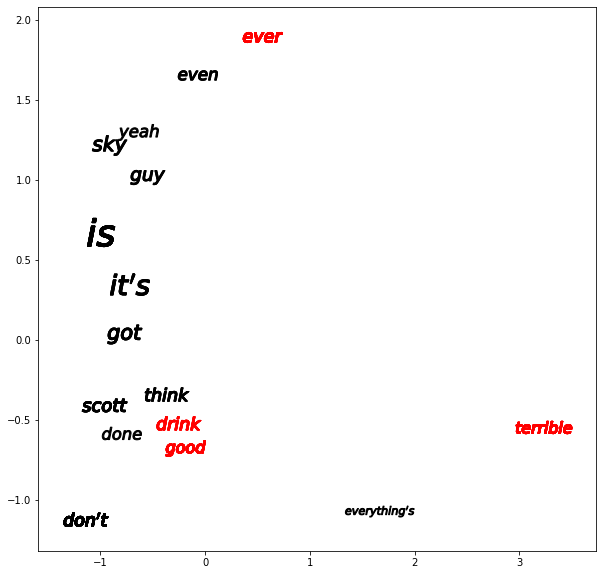

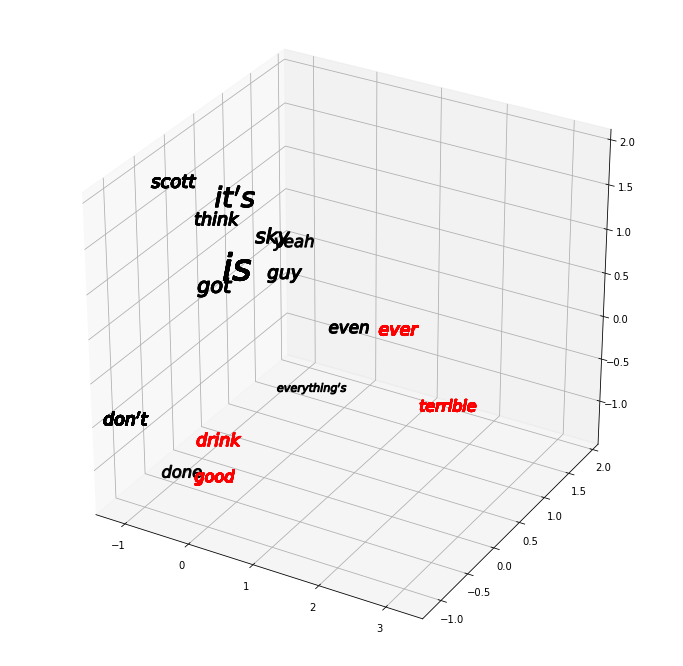

In [53]:
#!pip install keras
import chars2vec as c2v
import sklearn.decomposition
import matplotlib.pyplot as plt
import tensorflow as tf

""" Mute tensorflow warning """
#tf.logging.set_verbosity(tf.logging.ERROR)

""" 2D Visualization script by using PCA on the vectorization of a list of words"""

c2v_model = c2v.load_model("eng_50")

""" Words to visualize """

# Function for converting from sentenses to a list of unique words




#words =to_words(sentences)


word_embeddings = c2v_model.vectorize_words(words)



"""Embedding 2D projection with PCA"""
projection_2d = sklearn.decomposition.PCA(n_components=2).fit_transform(word_embeddings)

f = plt.figure(figsize=(10, 10))

for j in range(len(projection_2d)):
    plt.scatter(projection_2d[j, 0], projection_2d[j, 1],
                marker=('$' + words[j] + '$'),
                s=400 * len(words[j]), label=j,
                facecolors='red' if words[j]
                            in ref else 'black')
plt.show()


"""Embedding 3D projection with PCA"""
projection_3d = sklearn.decomposition.PCA(n_components=3).fit_transform(word_embeddings)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for j in range(len(projection_3d)):
    ax.scatter(projection_3d[j,0], projection_3d[j,1], projection_3d[j,2],
               marker=('$' + words[j] + '$'), s=400 * len(words[j]), label=j,
               facecolors='red' if words[j]
                           in ref else 'black')

plt.show()


In [ ]:
sentences = ["The life is like driving a bike",
             "life is bike",
             "The life is like a car",
             "The life is car wife cat"]

In [16]:
for j in range(len(projection_2d)):
    print("2D Vecrors", (words[j],projection_2d[j,0], projection_2d[j,1]))
               

2D Vecrors ('good', -0.19445325, -0.6721472)
2D Vecrors ("don't", -1.1443042, -1.1170496)
2D Vecrors ('ever', 0.54354703, 1.8954399)
2D Vecrors ('drink', -0.25782815, -0.5149339)
2D Vecrors ('scott', -0.9678523, -0.40192097)
2D Vecrors ("it's", -0.72548795, 0.35447955)
2D Vecrors ('terrible', 3.2228346, -0.5404255)
2D Vecrors ('good', -0.19445217, -0.67214704)
2D Vecrors ("don't", -1.1443052, -1.1170497)
2D Vecrors ('ever', 0.543547, 1.8954406)
2D Vecrors ('drink', -0.2578279, -0.51493365)
2D Vecrors ('scott', -0.9678521, -0.4019213)
2D Vecrors ("it's", -0.72548795, 0.35447955)
2D Vecrors ('terrible', 3.2228346, -0.5404257)
2D Vecrors ('good', -0.19445215, -0.6721469)
2D Vecrors ("don't", -1.1443052, -1.1170496)
2D Vecrors ('ever', 0.54354715, 1.8954405)
2D Vecrors ('drink', -0.25782806, -0.5149337)
2D Vecrors ('sky', -0.91524845, 1.2197913)
2D Vecrors ('is', -1.0003365, 0.67762125)
2D Vecrors ('terrible', 3.222835, -0.54042554)
2D Vecrors ('good', -0.19445221, -0.6721469)
2D Vecrors (

## Euclidean distances between vectors

### Straight-line distance between two points in Euclidean space. With this distance, Euclidean space becomes a metric space.

In [17]:
""" euclidean distances between vectors """
def print_distance(words):
    import numpy as np
    from scipy.spatial import distance

    print("\t", end = '')
    for word in words:
        print("%-10.6s" % word, end = '\t')
    print("")
    
    for i, vec1 in enumerate(word_embeddings):
        print(words[i], end = ' ')
        for vec2 in word_embeddings:
            print("%10.4f" % distance.euclidean(vec1,vec2), end = '\t')
        print("")
        


In [18]:
import pandas as pd
def makedf_distance(words, word_embeddings):
    import numpy as np
    import pandas as pd
    
    from scipy.spatial import distance
    data = {'Words': words} # first columns
    for i, vec1 in enumerate(word_embeddings):
        word1 = words[i]     
        column = [] # collection data for the next column
        for vec2 in word_embeddings:
            column.append(distance.euclidean(vec1,vec2))
        data[word1]=column # adding the list of values to the dictionary with key the word1

    return data

data = makedf_distance(words, word_embeddings)
df = pd.DataFrame(data, index = None) 

In [19]:
df

,Words,good,don't,ever,drink,scott,it's,terrible,sky,is,yeah,everything's,got,even,think,done,guy
0,good,0.000000,2.587548,3.339047,2.782683,3.675545,3.489370,4.005887,3.041628,2.704438,3.561367,4.881814,2.580617,3.394860,3.625782,1.997488,2.894662
1,don't,2.587548,0.000000,3.537856,2.234962,2.940234,3.013183,4.580773,3.170428,2.678371,3.239807,4.185601,2.253582,3.217797,3.335644,1.997334,3.167183
2,ever,3.339047,3.537856,0.000000,3.218918,3.947042,3.372915,3.903488,2.853083,2.946964,2.801254,4.671364,3.074940,1.520938,3.966517,3.337646,2.892336
3,drink,2.782683,2.234962,3.218918,0.000000,3.932180,3.033399,4.089437,3.236062,2.676386,3.289621,4.047315,3.082048,2.945321,3.063057,2.162403,3.135313
4,scott,3.675545,2.940234,3.947042,3.932180,0.000000,2.850666,4.737817,3.129391,3.058099,3.349654,4.903320,2.273474,3.901574,3.070759,3.805732,3.310739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,got,2.580617,2.253582,3.074940,3.082048,2.273474,2.423933,4.226820,2.259186,1.797285,2.574719,4.605998,0.000000,2.867893,3.262907,2.877128,2.142906
71,good,0.000000,2.587548,3.339047,2.782683,3.675545,3.489370,4.005887,3.041628,2.704438,3.561367,4.881814,2.580617,3.394860,3.625782,1.997488,2.894662
72,don't,2.587548,0.000000,3.537856,2.234962,2.940234,3.013183,4.580773,3.170428,2.678371,3.239807,4.185601,2.253582,3.217797,3.335644,1.997334,3.167183
73,ever,3.339047,3.537856,0.000000,3.218918,3.947042,3.372915,3.903488,2.853083,2.946964,2.801254,4.671364,3.074940,1.520938,3.966517,3.337646,2.892336


In [20]:
import matplotlib.pyplot as plt

#rs = np.random.RandomState(0)
#df2 = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,good,don't,ever,drink,scott,it's,terrible,sky,is,yeah,everything's,got,even,think,done,guy
good,1,0.381127,-0.0481913,0.347788,0.00370621,0.0215929,-0.347614,0.224692,0.280352,0.0947213,-0.428316,0.367543,0.0499333,-0.0083534,0.728006,0.283625
don't,0.381127,1,-0.166176,0.584891,0.365153,0.281782,-0.616274,0.214883,0.327349,0.232942,-0.117974,0.553644,0.0847157,0.20859,0.774409,0.198717
ever,-0.0481913,-0.166176,1,0.0141473,-0.207908,0.00187057,-0.196819,0.292811,0.148189,0.418301,-0.313065,0.03511,0.854478,-0.234193,0.0240219,0.291746
drink,0.347788,0.584891,0.0141473,1,-0.0466764,0.251272,-0.465443,0.213117,0.3406,0.232994,-0.057382,0.252029,0.245485,0.252634,0.723374,0.222738
scott,0.00370621,0.365153,-0.207908,-0.0466764,1,0.494936,-0.600372,0.356882,0.353253,0.320455,-0.437256,0.625927,-0.0689844,0.419038,0.129947,0.273309
it's,0.0215929,0.281782,0.00187057,0.251272,0.494936,1,-0.644932,0.653352,0.745547,0.571296,-0.41662,0.609917,0.209211,0.747219,0.237105,0.539713
terrible,-0.347614,-0.616274,-0.196819,-0.465443,-0.600372,-0.644932,1,-0.689105,-0.682559,-0.684807,0.424653,-0.711015,-0.471078,-0.503258,-0.662332,-0.614031
sky,0.224692,0.214883,0.292811,0.213117,0.356882,0.653352,-0.689105,1,0.904857,0.918474,-0.604001,0.702378,0.527281,0.377092,0.393292,0.94431
is,0.280352,0.327349,0.148189,0.3406,0.353253,0.745547,-0.682559,0.904857,1,0.818109,-0.502649,0.751387,0.416051,0.469185,0.476199,0.861812
yeah,0.0947213,0.232942,0.418301,0.232994,0.320455,0.571296,-0.684807,0.918474,0.818109,1,-0.539971,0.6542,0.639811,0.279936,0.360958,0.893293


## Sequence Matcher

### Similarity score ( float in [0,1] ) between input strings. It sums the sizes of all matched sequences returned by function get_matching_blocks and calculates the ratio as: ratio = 2.0*M / T , where M = matches , T = total number of elements in both sequences

In [21]:
from difflib import SequenceMatcher

def similar(a, b):
    sim = SequenceMatcher(None, a, b).ratio()
    return sim

def print_distance2(words):
    print("\t", end = '')
    for word in words:
        print("%-10.6s" % word, end = '\t')
    print("")
    for vec1 in words:
        print(vec1, end = ' ')
        for vec2 in words:
            print("%10.4f" % ((similar(vec1, vec2))), end = '\t')
        print("") 
        
    

In [22]:
import pandas as pd 
from difflib import SequenceMatcher

def similar(a, b):
    sim = SequenceMatcher(None, a, b).ratio()
    return sim

def makedf_distance2(words):
    data = {'Words': words}
    for word1 in words:
        column = []
        for word2 in words:
            column.append(similar(word1, word2))
        data[word1]=column
    return data
 
data = makedf_distance2(words)
df2 = pd.DataFrame(data, index = None) 

In [23]:
df2 # SequenceMatcher

,Words,good,don't,ever,drink,scott,it's,terrible,sky,is,yeah,everything's,got,even,think,done,guy
0,good,1.000000,0.222222,0.000000,0.222222,0.222222,0.000000,0.000000,0.00,0.000000,0.00,0.125000,0.571429,0.000000,0.00,0.250000,0.285714
1,don't,0.222222,1.000000,0.000000,0.400000,0.400000,0.222222,0.153846,0.00,0.000000,0.00,0.117647,0.500000,0.222222,0.20,0.666667,0.000000
2,ever,0.000000,0.000000,1.000000,0.222222,0.000000,0.000000,0.333333,0.00,0.000000,0.25,0.500000,0.000000,0.750000,0.00,0.250000,0.000000
3,drink,0.222222,0.400000,0.222222,1.000000,0.000000,0.222222,0.307692,0.25,0.285714,0.00,0.352941,0.000000,0.222222,0.60,0.444444,0.000000
4,scott,0.222222,0.400000,0.000000,0.000000,1.000000,0.222222,0.153846,0.25,0.285714,0.00,0.117647,0.500000,0.000000,0.20,0.222222,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,got,0.571429,0.500000,0.000000,0.000000,0.500000,0.285714,0.181818,0.00,0.000000,0.00,0.133333,1.000000,0.000000,0.25,0.285714,0.333333
71,good,1.000000,0.222222,0.000000,0.222222,0.222222,0.000000,0.000000,0.00,0.000000,0.00,0.125000,0.571429,0.000000,0.00,0.250000,0.285714
72,don't,0.222222,1.000000,0.000000,0.400000,0.400000,0.222222,0.153846,0.00,0.000000,0.00,0.117647,0.500000,0.222222,0.20,0.666667,0.000000
73,ever,0.000000,0.000000,1.000000,0.222222,0.000000,0.000000,0.333333,0.00,0.000000,0.25,0.500000,0.000000,0.750000,0.00,0.250000,0.000000


In [24]:
import matplotlib.pyplot as plt

#rs = np.random.RandomState(0)
#df2 = pd.DataFrame(rs.rand(10, 10))
corr2 = df2.corr()
corr2.style.background_gradient(cmap='coolwarm')

,good,don't,ever,drink,scott,it's,terrible,sky,is,yeah,everything's,got,even,think,done,guy
good,1,0.172907,-0.390776,-0.137612,0.155944,-0.352708,-0.491085,-0.292896,-0.38834,-0.393432,-0.515601,0.683526,-0.449874,-0.368033,0.170434,0.488672
don't,0.172907,1,-0.408483,0.245237,0.433772,-0.0220539,-0.223853,-0.344164,-0.37422,-0.4426,-0.491321,0.569905,-0.153702,0.06386,0.866154,-0.205053
ever,-0.390776,-0.408483,1,-0.0258091,-0.545203,-0.416485,0.369288,-0.329882,-0.292675,0.510405,0.704266,-0.559835,0.921831,-0.25132,-0.0698985,-0.26234
drink,-0.137612,0.245237,-0.0258091,1,-0.384857,0.0539772,0.135227,0.0454478,0.0840372,-0.192599,0.223639,-0.346278,0.0944443,0.639461,0.388374,-0.377986
scott,0.155944,0.433772,-0.545203,-0.384857,1,0.213615,-0.258087,0.100136,0.105878,-0.467995,-0.564123,0.587116,-0.520188,-0.0308423,0.141635,-0.119317
it's,-0.352708,-0.0220539,-0.416485,0.0539772,0.213615,1,-0.0662411,0.490599,0.839491,-0.36918,0.0564278,-0.12034,-0.440771,0.292551,-0.346454,-0.270525
terrible,-0.491085,-0.223853,0.369288,0.135227,-0.258087,-0.0662411,1,-0.285501,0.0214533,0.240338,0.339768,-0.340692,0.389434,0.261419,-0.161502,-0.38681
sky,-0.292896,-0.344164,-0.329882,0.0454478,0.100136,0.490599,-0.285501,1,0.650269,0.0921751,-0.028698,-0.371001,-0.422256,0.293462,-0.492648,0.183296
is,-0.38834,-0.37422,-0.292675,0.0840372,0.105878,0.839491,0.0214533,0.650269,1,-0.23062,0.147983,-0.423169,-0.388573,0.329269,-0.570136,-0.250373
yeah,-0.393432,-0.4426,0.510405,-0.192599,-0.467995,-0.36918,0.240338,0.0921751,-0.23062,1,0.413743,-0.461571,0.490967,1.278e-05,-0.197498,0.177592


## Levenstein distances

In [25]:
""" levenstein distances between vectors """
def print_distance3(words):
    import numpy as np
    import jellyfish

    print("\t", end = '')
    for word in words:
        print("%-10.6s" % word, end = '\t')
    print("")
    for vec1 in word_embeddings:
        print(vec1, end = ' ')
        for vec2 in word_embeddings:
            print("%10.4f" % jellyfish.levenshtein_distance(vec1,vec2), end = '\t')
        print("")       

        

In [26]:
def makedf_distance3(words):
    import numpy as np
    import jellyfish

    print("\t", end = '')
    for word1 in words:
        column = []
        for word2 in words:
            column.append(jellyfish.levenshtein_distance(word1, word2))
        data[word1]=column
    return data 
        
data = makedf_distance3(words)
df3 = pd.DataFrame(data, index = None)  

In [27]:
df3 # euclidean distances

,Words,good,don't,ever,drink,scott,it's,terrible,sky,is,yeah,everything's,got,even,think,done,guy
0,good,0,4,4,5,4,4,8,4,4,4,12,2,4,5,3,3
1,don't,4,0,5,4,4,4,8,5,5,5,10,3,5,5,2,5
2,ever,4,5,0,5,5,4,7,4,4,4,8,4,1,5,4,4
3,drink,5,4,5,0,5,5,6,5,4,5,9,5,4,2,3,5
4,scott,4,4,5,5,0,5,8,4,5,5,11,3,5,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,got,2,3,4,5,3,4,8,3,3,4,11,0,4,5,3,2
71,good,0,4,4,5,4,4,8,4,4,4,12,2,4,5,3,3
72,don't,4,0,5,4,4,4,8,5,5,5,10,3,5,5,2,5
73,ever,4,5,0,5,5,4,7,4,4,4,8,4,1,5,4,4


In [28]:
import matplotlib.pyplot as plt

#rs = np.random.RandomState(0)
#df2 = pd.DataFrame(rs.rand(10, 10))
corr3 = df3.corr()
corr3.style.background_gradient(cmap='coolwarm')

,good,don't,ever,drink,scott,it's,terrible,sky,is,yeah,everything's,got,even,think,done,guy
good,1,0.532123,0.469407,0.17572,0.663044,0.594103,-0.694718,0.725938,0.535315,0.763902,-0.720586,0.901588,0.497283,0.167295,0.746868,0.82706
don't,0.532123,1,0.151898,0.399691,0.626829,0.465333,-0.666366,0.400185,0.225732,0.407971,-0.410393,0.683788,0.183034,0.177935,0.89743,0.391715
ever,0.469407,0.151898,1,0.0693421,0.284642,0.493784,-0.477046,0.584585,0.457353,0.666711,0.0548556,0.450635,0.969321,0.120192,0.360764,0.574922
drink,0.17572,0.399691,0.0693421,1,0.254558,0.227027,-0.214302,0.258492,0.349006,0.273904,-0.098808,0.210776,0.251257,0.872547,0.558498,0.226161
scott,0.663044,0.626829,0.284642,0.254558,1,0.425971,-0.692753,0.65775,0.361042,0.553695,-0.602682,0.78804,0.316381,0.212661,0.695574,0.565117
it's,0.594103,0.465333,0.493784,0.227027,0.425971,1,-0.59961,0.73414,0.869058,0.74391,-0.323736,0.674925,0.514606,0.222578,0.588017,0.722919
terrible,-0.694718,-0.666366,-0.477046,-0.214302,-0.692753,-0.59961,1,-0.700465,-0.486055,-0.622203,0.231628,-0.798548,-0.51034,-0.185589,-0.69249,-0.690277
sky,0.725938,0.400185,0.584585,0.258492,0.65775,0.73414,-0.700465,1,0.801229,0.837191,-0.520239,0.837757,0.621234,0.289304,0.628936,0.941067
is,0.535315,0.225732,0.457353,0.349006,0.361042,0.869058,-0.486055,0.801229,1,0.729823,-0.3393,0.635336,0.510575,0.412602,0.459819,0.789293
yeah,0.763902,0.407971,0.666711,0.273904,0.553695,0.74391,-0.622203,0.837191,0.729823,1,-0.472562,0.773459,0.700681,0.293489,0.662564,0.845548


## Cosine distances

### Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. 

In [29]:
""" cosine distances between vectors """
def print_distance4(words):
    from scipy import spatial
    import numpy as np
    df= pd.DataFrame()
    print("\t", end = '')
    for word in words:
        print("%-10.6s" % word, end = '\t')
    print("")
    for i, vec1 in enumerate(word_embeddings):
        print(words[i], end = ' ')
        for vec2 in word_embeddings:
            print("%10.4f" % (1 - spatial.distance.cosine(vec1,vec2)), end = '\t')
            temp = 1 - spatial.distance.cosine(vec1,vec2)
            df.append
        print("")    
  


In [30]:
def makedf_distance4(words, word_embeddings):
    import numpy as np
    
    from scipy.spatial import distance
    
    data = {'Words': words} # first columns
    for i, vec1 in enumerate(word_embeddings):
        word1 = words[i]     
        column = [] # collection data for the next column
        for vec2 in word_embeddings:
            column.append(1 - distance.cosine(vec1,vec2))
        data[word1]=column # adding the list of values to the dictionary with key the word1

    return data

data = makedf_distance4(words, word_embeddings)
df4 = pd.DataFrame(data, index = None) 

In [31]:
df4 # cosine distances

,Words,good,don't,ever,drink,scott,it's,terrible,sky,is,yeah,everything's,got,even,think,done,guy
0,good,1.000000,0.519283,0.187630,0.450835,0.125813,0.086810,0.257075,-0.077927,0.194333,-0.337809,0.091488,0.378226,0.129213,0.127942,0.688524,-0.046552
1,don't,0.519283,1.000000,0.132355,0.662116,0.466262,0.353468,0.038546,-0.086498,0.290238,-0.014939,0.382445,0.573776,0.257461,0.294864,0.706875,-0.188238
2,ever,0.187630,0.132355,1.000000,0.290146,0.023236,0.178655,0.312926,0.136907,0.079011,0.249145,0.195922,0.147760,0.832311,-0.010194,0.163576,0.036719
3,drink,0.450835,0.662116,0.290146,1.000000,0.051787,0.352757,0.251043,-0.117429,0.309167,-0.031107,0.432536,0.173135,0.385794,0.411844,0.660805,-0.130552
4,scott,0.125813,0.466262,0.023236,0.051787,1.000000,0.482098,0.037658,0.129449,0.189389,0.063330,0.156318,0.644135,0.015580,0.454531,0.036326,-0.089483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,got,0.378226,0.573776,0.147760,0.173135,0.644135,0.463719,0.033002,0.151368,0.488254,0.045186,0.113721,1.000000,0.226272,0.148210,0.183957,0.163101
71,good,1.000000,0.519283,0.187630,0.450835,0.125813,0.086810,0.257075,-0.077927,0.194333,-0.337809,0.091488,0.378226,0.129213,0.127942,0.688524,-0.046552
72,don't,0.519283,1.000000,0.132355,0.662116,0.466262,0.353468,0.038546,-0.086498,0.290238,-0.014939,0.382445,0.573776,0.257461,0.294864,0.706875,-0.188238
73,ever,0.187630,0.132355,1.000000,0.290146,0.023236,0.178655,0.312926,0.136907,0.079011,0.249145,0.195922,0.147760,0.832311,-0.010194,0.163576,0.036719


In [32]:
import matplotlib.pyplot as plt

#rs = np.random.RandomState(0)
#df2 = pd.DataFrame(rs.rand(10, 10))
corr4 = df4.corr()
corr4.style.background_gradient(cmap='coolwarm')

,good,don't,ever,drink,scott,it's,terrible,sky,is,yeah,everything's,got,even,think,done,guy
good,1,0.568219,-0.159205,0.539547,-0.0576439,-0.316554,0.135364,-0.429999,-0.103098,-0.711808,0.0869062,0.241223,-0.199013,-0.0841987,0.818408,-0.331574
don't,0.568219,1,-0.350893,0.724456,0.49413,0.211981,-0.257922,-0.220865,0.219043,-0.256326,0.21514,0.642325,-0.145192,0.30617,0.838862,-0.368875
ever,-0.159205,-0.350893,1,-0.0332532,-0.498005,-0.378929,0.310138,-0.0726775,-0.356038,0.288619,0.119027,-0.449224,0.905445,-0.494277,-0.134446,-0.00942097
drink,0.539547,0.724456,-0.0332532,1,-0.0864253,0.0615925,0.0702584,-0.40628,0.0503889,-0.349323,0.458359,0.0565043,0.115464,0.297024,0.82921,-0.48705
scott,-0.0576439,0.49413,-0.498005,-0.0864253,1,0.546508,-0.310987,0.0885069,0.244332,0.00204752,-0.0380271,0.766265,-0.424132,0.533157,0.0280674,-0.184751
it's,-0.316554,0.211981,-0.378929,0.0615925,0.546508,1,-0.507215,0.480229,0.754148,0.242122,-0.19151,0.479188,-0.19837,0.783958,-0.12782,0.0839928
terrible,0.135364,-0.257922,0.310138,0.0702584,-0.310987,-0.507215,1,-0.867134,-0.865732,-0.613846,0.771781,-0.534709,-0.0304313,-0.0934134,-0.12487,-0.699114
sky,-0.429999,-0.220865,-0.0726775,-0.40628,0.0885069,0.480229,-0.867134,1,0.793201,0.753126,-0.85408,0.246788,0.165512,-0.0147154,-0.299107,0.850718
is,-0.103098,0.219043,-0.356038,0.0503889,0.244332,0.754148,-0.865732,0.793201,1,0.421958,-0.624921,0.533718,-0.0517231,0.334926,0.0799797,0.562202
yeah,-0.711808,-0.256326,0.288619,-0.349323,0.00204752,0.242122,-0.613846,0.753126,0.421958,1,-0.488077,0.0196651,0.507751,-0.20388,-0.394307,0.647869


In [46]:
corr_between_methods=pd.DataFrame()
#hh=hh.append([df["Eucledian_distance"],df2["SequenceMatcher"],df3["Levenstein"],df4["Cosine_distances"]]).T
corr_between_methods=corr_between_methods.append([df["drink"],df2["drink"],df3["drink"],df4["drink"]]).T


In [47]:
colnames = ['d1', 'd2', 'd3', 'd4']

In [48]:
corr_between_methods.columns = ['Eucledian_distance', 'SequenceMatcher', 'Levenstein_distance', 'Cosine_distances']

In [49]:
corr_between_methods.corr()

,Eucledian_distance,SequenceMatcher,Levenstein_distance,Cosine_distances
Eucledian_distance,1.000000,-0.767363,0.867578,-0.822330
SequenceMatcher,-0.767363,1.000000,-0.779555,0.828549
Levenstein_distance,0.867578,-0.779555,1.000000,-0.667989
Cosine_distances,-0.822330,0.828549,-0.667989,1.000000


In [50]:
correlation = corr_between_methods.corr()


In [51]:
correlation.style.background_gradient(cmap='coolwarm')

,Eucledian_distance,SequenceMatcher,Levenstein_distance,Cosine_distances
Eucledian_distance,1,-0.767363,0.867578,-0.82233
SequenceMatcher,-0.767363,1,-0.779555,0.828549
Levenstein_distance,0.867578,-0.779555,1,-0.667989
Cosine_distances,-0.82233,0.828549,-0.667989,1


In [39]:

for word2 in words:
    hh=pd.DataFrame()
    hh=hh.append([df[word2],df2[word2],df3[word2],df4[word2]]).T
    print(hh)

        good      good  good      good
0   0.000000  1.000000   0.0  1.000000
1   2.587548  0.222222   4.0  0.519283
2   3.339047  0.000000   4.0  0.187630
3   2.782683  0.222222   5.0  0.450835
4   3.675545  0.222222   4.0  0.125813
..       ...       ...   ...       ...
70  2.580617  0.571429   2.0  0.378226
71  0.000000  1.000000   0.0  1.000000
72  2.587548  0.222222   4.0  0.519283
73  3.339047  0.000000   4.0  0.187630
74  2.580617  0.571429   2.0  0.378226

[75 rows x 4 columns]
       don't     don't  don't     don't
0   2.587548  0.222222    4.0  0.519283
1   0.000000  1.000000    0.0  1.000000
2   3.537856  0.000000    5.0  0.132355
3   2.234962  0.400000    4.0  0.662116
4   2.940234  0.400000    4.0  0.466262
..       ...       ...    ...       ...
70  2.253582  0.500000    3.0  0.573776
71  2.587548  0.222222    4.0  0.519283
72  0.000000  1.000000    0.0  1.000000
73  3.537856  0.000000    5.0  0.132355
74  2.253582  0.500000    3.0  0.573776

[75 rows x 4 columns]
      

         sky   sky  sky       sky
0   3.041628  0.00  4.0 -0.077927
1   3.170428  0.00  5.0 -0.086498
2   2.853083  0.00  4.0  0.136907
3   3.236062  0.25  5.0 -0.117429
4   3.129391  0.25  4.0  0.129449
..       ...   ...  ...       ...
70  2.259186  0.00  3.0  0.151368
71  3.041628  0.00  4.0 -0.077927
72  3.170428  0.00  5.0 -0.086498
73  2.853083  0.00  4.0  0.136907
74  2.259186  0.00  3.0  0.151368

[75 rows x 4 columns]
          is        is   is        is
0   2.704438  0.000000  4.0  0.194333
1   2.678371  0.000000  5.0  0.290238
2   2.946964  0.000000  4.0  0.079011
3   2.676386  0.285714  4.0  0.309167
4   3.058099  0.285714  5.0  0.189389
..       ...       ...  ...       ...
70  1.797285  0.000000  3.0  0.488254
71  2.704438  0.000000  4.0  0.194333
72  2.678371  0.000000  5.0  0.290238
73  2.946964  0.000000  4.0  0.079011
74  1.797285  0.000000  3.0  0.488254

[75 rows x 4 columns]
    terrible  terrible  terrible  terrible
0   4.005887  0.000000       8.0  0.257075
1   

         got       got  got       got
0   2.580617  0.571429  2.0  0.378226
1   2.253582  0.500000  3.0  0.573776
2   3.074940  0.000000  4.0  0.147760
3   3.082048  0.000000  5.0  0.173135
4   2.273474  0.500000  3.0  0.644135
..       ...       ...  ...       ...
70  0.000000  1.000000  0.0  1.000000
71  2.580617  0.571429  2.0  0.378226
72  2.253582  0.500000  3.0  0.573776
73  3.074940  0.000000  4.0  0.147760
74  0.000000  1.000000  0.0  1.000000

[75 rows x 4 columns]
        it's      it's  it's      it's
0   3.489370  0.000000   4.0  0.086810
1   3.013183  0.222222   4.0  0.353468
2   3.372915  0.000000   4.0  0.178655
3   3.033399  0.222222   5.0  0.352757
4   2.850666  0.222222   5.0  0.482098
..       ...       ...   ...       ...
70  2.423933  0.285714   4.0  0.463719
71  3.489370  0.000000   4.0  0.086810
72  3.013183  0.222222   4.0  0.353468
73  3.372915  0.000000   4.0  0.178655
74  2.423933  0.285714   4.0  0.463719

[75 rows x 4 columns]
    terrible  terrible  terrib

       think  think  think     think
0   3.625782   0.00    5.0  0.127942
1   3.335644   0.20    5.0  0.294864
2   3.966517   0.00    5.0 -0.010194
3   3.063057   0.60    2.0  0.411844
4   3.070759   0.20    5.0  0.454531
..       ...    ...    ...       ...
70  3.262907   0.25    5.0  0.148210
71  3.625782   0.00    5.0  0.127942
72  3.335644   0.20    5.0  0.294864
73  3.966517   0.00    5.0 -0.010194
74  3.262907   0.25    5.0  0.148210

[75 rows x 4 columns]
         guy       guy  guy       guy
0   2.894662  0.285714  3.0 -0.046552
1   3.167183  0.000000  5.0 -0.188238
2   2.892336  0.000000  4.0  0.036719
3   3.135313  0.000000  5.0 -0.130552
4   3.310739  0.000000  5.0 -0.089483
..       ...       ...  ...       ...
70  2.142906  0.333333  2.0  0.163101
71  2.894662  0.285714  3.0 -0.046552
72  3.167183  0.000000  5.0 -0.188238
73  2.892336  0.000000  4.0  0.036719
74  2.142906  0.333333  2.0  0.163101

[75 rows x 4 columns]
          is        is   is        is
0   2.704438  0.

## Fuzzy Rates

In [251]:
df = pd.read_pickle("df_clean_newwer_new_last.pkl")
df.shape

(333458, 10)

In [252]:
from fuzzywuzzy import fuzz

C:\Users\ooles\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [253]:
def get_ratio(row):
    refer = row['reference.text']
    hypot = row['hypothesis.text']
    return fuzz.partial_ratio(refer, hypot)

In [254]:
test_df = df[df['identifier'] == df['identifier']]
test_df = test_df.drop(['file', "speaker_id"], axis=1)

In [255]:
test_df

,identifier,corpus,configuration,machine,reference.text,hypothesis.text,scoring.wer,recomputed_wer
1,sw2061A-ms98-a-0123,switchboard_segmented,amazon__8000_8,amazon,yeah because see what happens is they have a g...,yeah because see what happens is they have a g...,0.000000,0.000000
2720,sw2831A-ms98-a-0046,switchboard_segmented,amazon__8000_8,amazon,i think people are going to follow the stock m...,i think people are going to follow the stock m...,0.000000,0.000000
2721,sw2567B-ms98-a-0068,switchboard_segmented,amazon__8000_8,amazon,good don't ever drink scotch it's terrible,good don't ever drink scott it's terrible,0.142857,0.142857
2723,sw4276B-ms98-a-0033,switchboard_segmented,amazon__8000_8,amazon,so they're going to continue,so they're going to continue,0.000000,0.000000
2727,sw3117B-ms98-a-0031,switchboard_segmented,amazon__8000_8,amazon,and see back when i went to school there when ...,and see back when i went to school there when ...,0.133333,0.133333
...,...,...,...,...,...,...,...,...
1325,sw2275A-ms98-a-0113,switchboard_segmented,sphinx4__am_generic_ptm__lm_generic_p__8000_8,sphinx4,well i think i've um you're the second female ...,one,1.000000,1.000000
1344,sw3843B-ms98-a-0026,switchboard_segmented,sphinx4__am_generic_ptm__lm_generic_p__8000_8,sphinx4,there again that doesn't seem like a whole lot...,pope,1.000000,1.000000
1348,sw4378A-ms98-a-0054,switchboard_segmented,sphinx4__am_generic_ptm__lm_generic_p__8000_8,sphinx4,fraid i haven't uh i haven't been in any really,what,1.000000,1.000000
1303,sw2228B-ms98-a-0076,switchboard_segmented,sphinx4__am_generic_ptm__lm_generic_p__8000_8,sphinx4,do you think it is necessary to have the,but,1.000000,1.000000


In [256]:
test_df["fuzzy_rate"]=test_df.apply(get_ratio, axis=1)

In [257]:
df_fuzzy = test_df.drop(['configuration', 'identifier', "recomputed_wer"],1)

In [258]:
df_fuzzy

,corpus,machine,reference.text,hypothesis.text,scoring.wer,fuzzy_rate
1,switchboard_segmented,amazon,yeah because see what happens is they have a g...,yeah because see what happens is they have a g...,0.000000,100
2720,switchboard_segmented,amazon,i think people are going to follow the stock m...,i think people are going to follow the stock m...,0.000000,100
2721,switchboard_segmented,amazon,good don't ever drink scotch it's terrible,good don't ever drink scott it's terrible,0.142857,95
2723,switchboard_segmented,amazon,so they're going to continue,so they're going to continue,0.000000,100
2727,switchboard_segmented,amazon,and see back when i went to school there when ...,and see back when i went to school there when ...,0.133333,86
...,...,...,...,...,...,...
1325,switchboard_segmented,sphinx4,well i think i've um you're the second female ...,one,1.000000,67
1344,switchboard_segmented,sphinx4,there again that doesn't seem like a whole lot...,pope,1.000000,50
1348,switchboard_segmented,sphinx4,fraid i haven't uh i haven't been in any really,what,1.000000,50
1303,switchboard_segmented,sphinx4,do you think it is necessary to have the,but,1.000000,67
